In [1]:
import os
import pandas as pd
import shutil

In [2]:
csv_file = pd.read_csv("C:/Users/msyu7/Desktop/detection/code/gastroscopy_data2.csv")

In [5]:
#먼저 2048 -> 256으로 바꿔주기

csv_path = 'C:/Users/msyu7/Desktop/detection/code/gastroscopy_data2.csv'
output_csv_path = 'C:/Users/msyu7/Desktop/detection/code/gastroscopy_meta_256.csv'

scale_factor = 256 / 2048  # 0.125

df = pd.read_csv(csv_path)

df['x_min'] = df['x_min'] * scale_factor
df['y_min'] = df['y_min'] * scale_factor
df['x_max'] = df['x_max'] * scale_factor
df['y_max'] = df['y_max'] * scale_factor
# df['polygon_mask'] = df['polygon_mask'] * scale_factor
df['width'] = df['width'] * scale_factor
df['height'] = df['height'] * scale_factor

df[['x_min', 'y_min', 'x_max', 'y_max']] = df[['x_min', 'y_min', 'x_max', 'y_max']].round(6)

df.to_csv(output_csv_path, index=False)

In [ ]:
csv_file = 'C:/Users/msyu7/Desktop/detection/code/gastroscopy_meta_256.csv'
label_dir = 'C:/Users/msyu7/Desktop/detection/Dataset/labels/train'

class_mapping = {"ulcer": 0, 'polyp':1, "cancer":2}

df = pd.read_csv(csv_file)

In [ ]:
from sklearn.model_selection import StratifiedKFold

df = pd.read_csv("C:/Users/msyu7/Desktop/detection/256_gastroscopy/train_meta.csv")

df['label'] = df['image_id'].apply(lambda x: int(x.split('_')[1]))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in skf.split(df, df['label']):
    train_df = df.iloc[train_index]
    val_df = df.iloc[val_index]
    
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)

In [ ]:
csv_file = 'C:/Users/msyu7/Desktop/detection/code/gastroscopy_meta_256.csv'
label_dir = 'C:/Users/msyu7/Desktop/detection/Dataset/labels/train'

class_mapping = {"ulcer": 0, 'polyp':1, "cancer":2}

df = pd.read_csv(csv_file)

for index, row in df.iterrows():
    image_name = row['image_id']
    class_name = row['lesion']
    class_id = class_mapping[class_name]

    x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
    img_width, img_height = row['width'], row['height']

    x_center = ((x_min + x_max) / 2) / img_width
    y_center = ((y_min + y_max) / 2) / img_height
    bbox_width = (x_max - x_min) / img_width
    bbox_height = (y_max - y_min) / img_height

    label_path = os.path.join(label_dir, image_name.replace('.png', '.txt'))

    with open(label_path, 'a') as label_file:
        label_file.write(f"{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}/n")

In [10]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: ultralytics in c:\users\msyu7\appdata\local\programs\python\python312\lib\site-packages (8.3.65)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ultralytics import YOLO

In [25]:
import torch
print(torch.__version__)

2.4.1+cu124


In [3]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

results = model.train(
    data="C:/Users/msyu7/Desktop/detection/Dataset/data.yaml",
    project="C:/Users/msyu7/Desktop/detection/experiments",
    name="exp0",
    epochs=50,
    imgsz=256,
    augment=False,
    hsv_h=0.0,
    hsv_s=0.0,
    hsv_v=0.0,
    degrees=0.0,
    translate=0.0,
    scale=0.0,
    shear=0.0,
    perspective=0.0,
    flipud=0.0,
    fliplr=0.0,
    mosaic=0.0,
    mixup=0.0,
    auto_augment="none",
    erasing=0.0,
    copy_paste=0.0
)

New https://pypi.org/project/ultralytics/8.3.70 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.68  Python-3.12.5 torch-2.4.1+cu124 CPU (13th Gen Intel Core(TM) i7-1360P)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:/Users/msyu7/Desktop/detection/Dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=C:/Users/msyu7/Desktop/detection/experiments, name=exp0, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False,

train: Scanning C:\Users\msyu7\Desktop\detection\Dataset\labels\train.cache... 1280 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1280/1280 [00:00<?, ?it/s]

train: WARNING  C:\Users\msyu7\Desktop\detection\Dataset\images\train\1_1_00024.png: 2 duplicate labels removed
train: WARNING  C:\Users\msyu7\Desktop\detection\Dataset\images\train\1_1_00027.png: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\msyu7\Desktop\detection\Dataset\labels\val.cache... 320 images, 0 backgrounds, 0 corrupt: 100%|██████████| 320/320 [00:00<?, ?it/s]


Plotting labels to C:\Users\msyu7\Desktop\detection\experiments\exp0\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to C:\Users\msyu7\Desktop\detection\experiments\exp0
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.524      2.883      1.456         21        256: 100%|██████████| 80/80 [00:51<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

                   all        320        450      0.277      0.253      0.252      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.538      2.192       1.41         21        256: 100%|██████████| 80/80 [00:49<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]

                   all        320        450      0.362      0.283      0.236      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G       1.44       1.92      1.365         18        256: 100%|██████████| 80/80 [00:48<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

                   all        320        450      0.182      0.338      0.181     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G        1.4       1.77      1.318         22        256: 100%|██████████| 80/80 [00:48<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]

                   all        320        450      0.489      0.408      0.405       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.276      1.566      1.234         19        256: 100%|██████████| 80/80 [00:47<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        320        450      0.437       0.46      0.412      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.186      1.413      1.186         26        256: 100%|██████████| 80/80 [00:49<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

                   all        320        450      0.523      0.445       0.43      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.109      1.229      1.139         24        256: 100%|██████████| 80/80 [02:28<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:13<00:00,  1.38s/it]

                   all        320        450      0.535      0.465      0.451      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.029      1.127      1.086         24        256: 100%|██████████| 80/80 [00:56<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        320        450      0.481      0.501      0.438      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.9421     0.9861      1.031         35        256: 100%|██████████| 80/80 [00:46<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]

                   all        320        450       0.61      0.464      0.495      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.8785     0.8953      1.003         21        256: 100%|██████████| 80/80 [00:45<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]

                   all        320        450       0.52      0.485      0.451      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.8249     0.8073     0.9661         26        256: 100%|██████████| 80/80 [00:46<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.13it/s]

                   all        320        450      0.586      0.498      0.493       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.7718     0.7496     0.9464         23        256: 100%|██████████| 80/80 [00:45<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.11it/s]

                   all        320        450      0.507      0.494      0.461      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.7168     0.6791     0.9157         17        256: 100%|██████████| 80/80 [00:44<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.10it/s]

                   all        320        450       0.61      0.446      0.501      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.6908     0.6418     0.9015         22        256: 100%|██████████| 80/80 [00:51<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]

                   all        320        450       0.59      0.474      0.467      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.6485     0.5817     0.8834         22        256: 100%|██████████| 80/80 [00:48<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.10it/s]

                   all        320        450      0.627      0.449      0.492      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.6108     0.5746     0.8681         20        256: 100%|██████████| 80/80 [00:46<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]

                   all        320        450      0.569      0.468      0.457       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.5942      0.525     0.8572         23        256: 100%|██████████| 80/80 [02:46<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:17<00:00,  1.73s/it]

                   all        320        450      0.521      0.479      0.443       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.5586     0.5102     0.8461         17        256: 100%|██████████| 80/80 [04:05<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:17<00:00,  1.74s/it]

                   all        320        450      0.576      0.511      0.496      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      0.524     0.4705     0.8293         16        256: 100%|██████████| 80/80 [04:34<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:17<00:00,  1.72s/it]

                   all        320        450      0.653      0.458      0.497      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.5011     0.4421     0.8197         29        256: 100%|██████████| 80/80 [04:59<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:16<00:00,  1.65s/it]

                   all        320        450      0.629      0.464       0.51      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.4725      0.418      0.811         25        256: 100%|██████████| 80/80 [01:55<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.10it/s]

                   all        320        450      0.633      0.497      0.507      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.4571     0.3939     0.8051         37        256: 100%|██████████| 80/80 [00:46<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.11it/s]

                   all        320        450      0.673      0.482      0.516      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.4318     0.3777     0.7996         26        256: 100%|██████████| 80/80 [00:45<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.16it/s]

                   all        320        450      0.582      0.503      0.505      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.4105     0.3565     0.7914         25        256: 100%|██████████| 80/80 [00:45<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.14it/s]

                   all        320        450      0.695      0.483      0.521      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.3972     0.3557     0.7876         21        256: 100%|██████████| 80/80 [00:46<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.14it/s]

                   all        320        450      0.628      0.505      0.532      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.3691     0.3321     0.7808         19        256: 100%|██████████| 80/80 [00:45<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.16it/s]

                   all        320        450      0.593      0.465      0.508      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.3563     0.3164     0.7777         22        256: 100%|██████████| 80/80 [00:45<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]

                   all        320        450      0.602      0.432      0.462      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.3488      0.308     0.7738         22        256: 100%|██████████| 80/80 [00:44<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]

                   all        320        450      0.611        0.5      0.519       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.3311     0.2993     0.7726         22        256: 100%|██████████| 80/80 [00:45<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.06it/s]

                   all        320        450       0.66      0.501       0.55      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.3118     0.2872     0.7669         26        256: 100%|██████████| 80/80 [00:49<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

                   all        320        450      0.637      0.523      0.545      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.2963     0.2714      0.765         18        256: 100%|██████████| 80/80 [01:11<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        320        450      0.618      0.499      0.504      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.2809       0.26     0.7615         19        256: 100%|██████████| 80/80 [00:49<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.13it/s]

                   all        320        450      0.626      0.487      0.519      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.2686     0.2491     0.7599         28        256: 100%|██████████| 80/80 [00:51<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]

                   all        320        450      0.569      0.491      0.509      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.2533     0.2377     0.7552         23        256: 100%|██████████| 80/80 [00:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

                   all        320        450      0.682      0.448       0.51      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.2443     0.2291      0.754         23        256: 100%|██████████| 80/80 [00:55<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        320        450      0.672      0.452      0.504      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.2369     0.2198     0.7522         18        256: 100%|██████████| 80/80 [00:50<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.00it/s]

                   all        320        450      0.685      0.466      0.531      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.2218     0.2073     0.7508         22        256: 100%|██████████| 80/80 [01:48<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:16<00:00,  1.68s/it]

                   all        320        450      0.687      0.487      0.534      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      0.215     0.2027     0.7492         24        256: 100%|██████████| 80/80 [05:58<00:00,  4.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:17<00:00,  1.70s/it]

                   all        320        450      0.515      0.542      0.505      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.2045     0.1971     0.7471         21        256: 100%|██████████| 80/80 [06:03<00:00,  4.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:16<00:00,  1.69s/it]

                   all        320        450      0.607        0.5      0.529      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.1961     0.1867      0.749         21        256: 100%|██████████| 80/80 [05:38<00:00,  4.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]

                   all        320        450      0.568      0.554       0.54      0.276


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.1862      0.181      0.748         23        256: 100%|██████████| 80/80 [00:44<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.11it/s]

                   all        320        450      0.624      0.505       0.53      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.1784     0.1764      0.745         19        256: 100%|██████████| 80/80 [00:47<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.10it/s]

                   all        320        450       0.64       0.47      0.531      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      0.164     0.1658     0.7435         29        256: 100%|██████████| 80/80 [00:47<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]

                   all        320        450      0.656      0.498      0.528      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.1594     0.1627     0.7435         24        256: 100%|██████████| 80/80 [00:45<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]

                   all        320        450       0.63      0.497      0.524      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.1547     0.1541      0.743         19        256: 100%|██████████| 80/80 [00:45<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]

                   all        320        450       0.62      0.514      0.525      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.1481     0.1577     0.7421         19        256: 100%|██████████| 80/80 [00:46<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        320        450      0.679      0.471      0.531      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.1363     0.1457     0.7422         20        256: 100%|██████████| 80/80 [01:15<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.10it/s]

                   all        320        450      0.579      0.524      0.532      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      0.132      0.142     0.7475         26        256: 100%|██████████| 80/80 [00:45<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.10it/s]

                   all        320        450      0.691      0.465      0.528      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.1198      0.133     0.7417         25        256: 100%|██████████| 80/80 [00:45<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]

                   all        320        450      0.666      0.455      0.522      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.1116     0.1315     0.7394         20        256: 100%|██████████| 80/80 [00:46<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]

                   all        320        450      0.615      0.497      0.524      0.266



50 epochs completed in 1.319 hours.
Optimizer stripped from C:\Users\msyu7\Desktop\detection\experiments\exp0\weights\last.pt, 5.4MB
Optimizer stripped from C:\Users\msyu7\Desktop\detection\experiments\exp0\weights\best.pt, 5.4MB

Validating C:\Users\msyu7\Desktop\detection\experiments\exp0\weights\best.pt...
Ultralytics 8.3.68  Python-3.12.5 torch-2.4.1+cu124 CPU (13th Gen Intel Core(TM) i7-1360P)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


                   all        320        450      0.659      0.501       0.55      0.277
                 ulcer         80        108      0.551      0.352      0.332      0.154
                 polyp         80        148      0.755      0.588        0.7      0.358
                cancer        160        194      0.672      0.562      0.618      0.319
Speed: 0.1ms preprocess, 10.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to C:\Users\msyu7\Desktop\detection\experiments\exp0


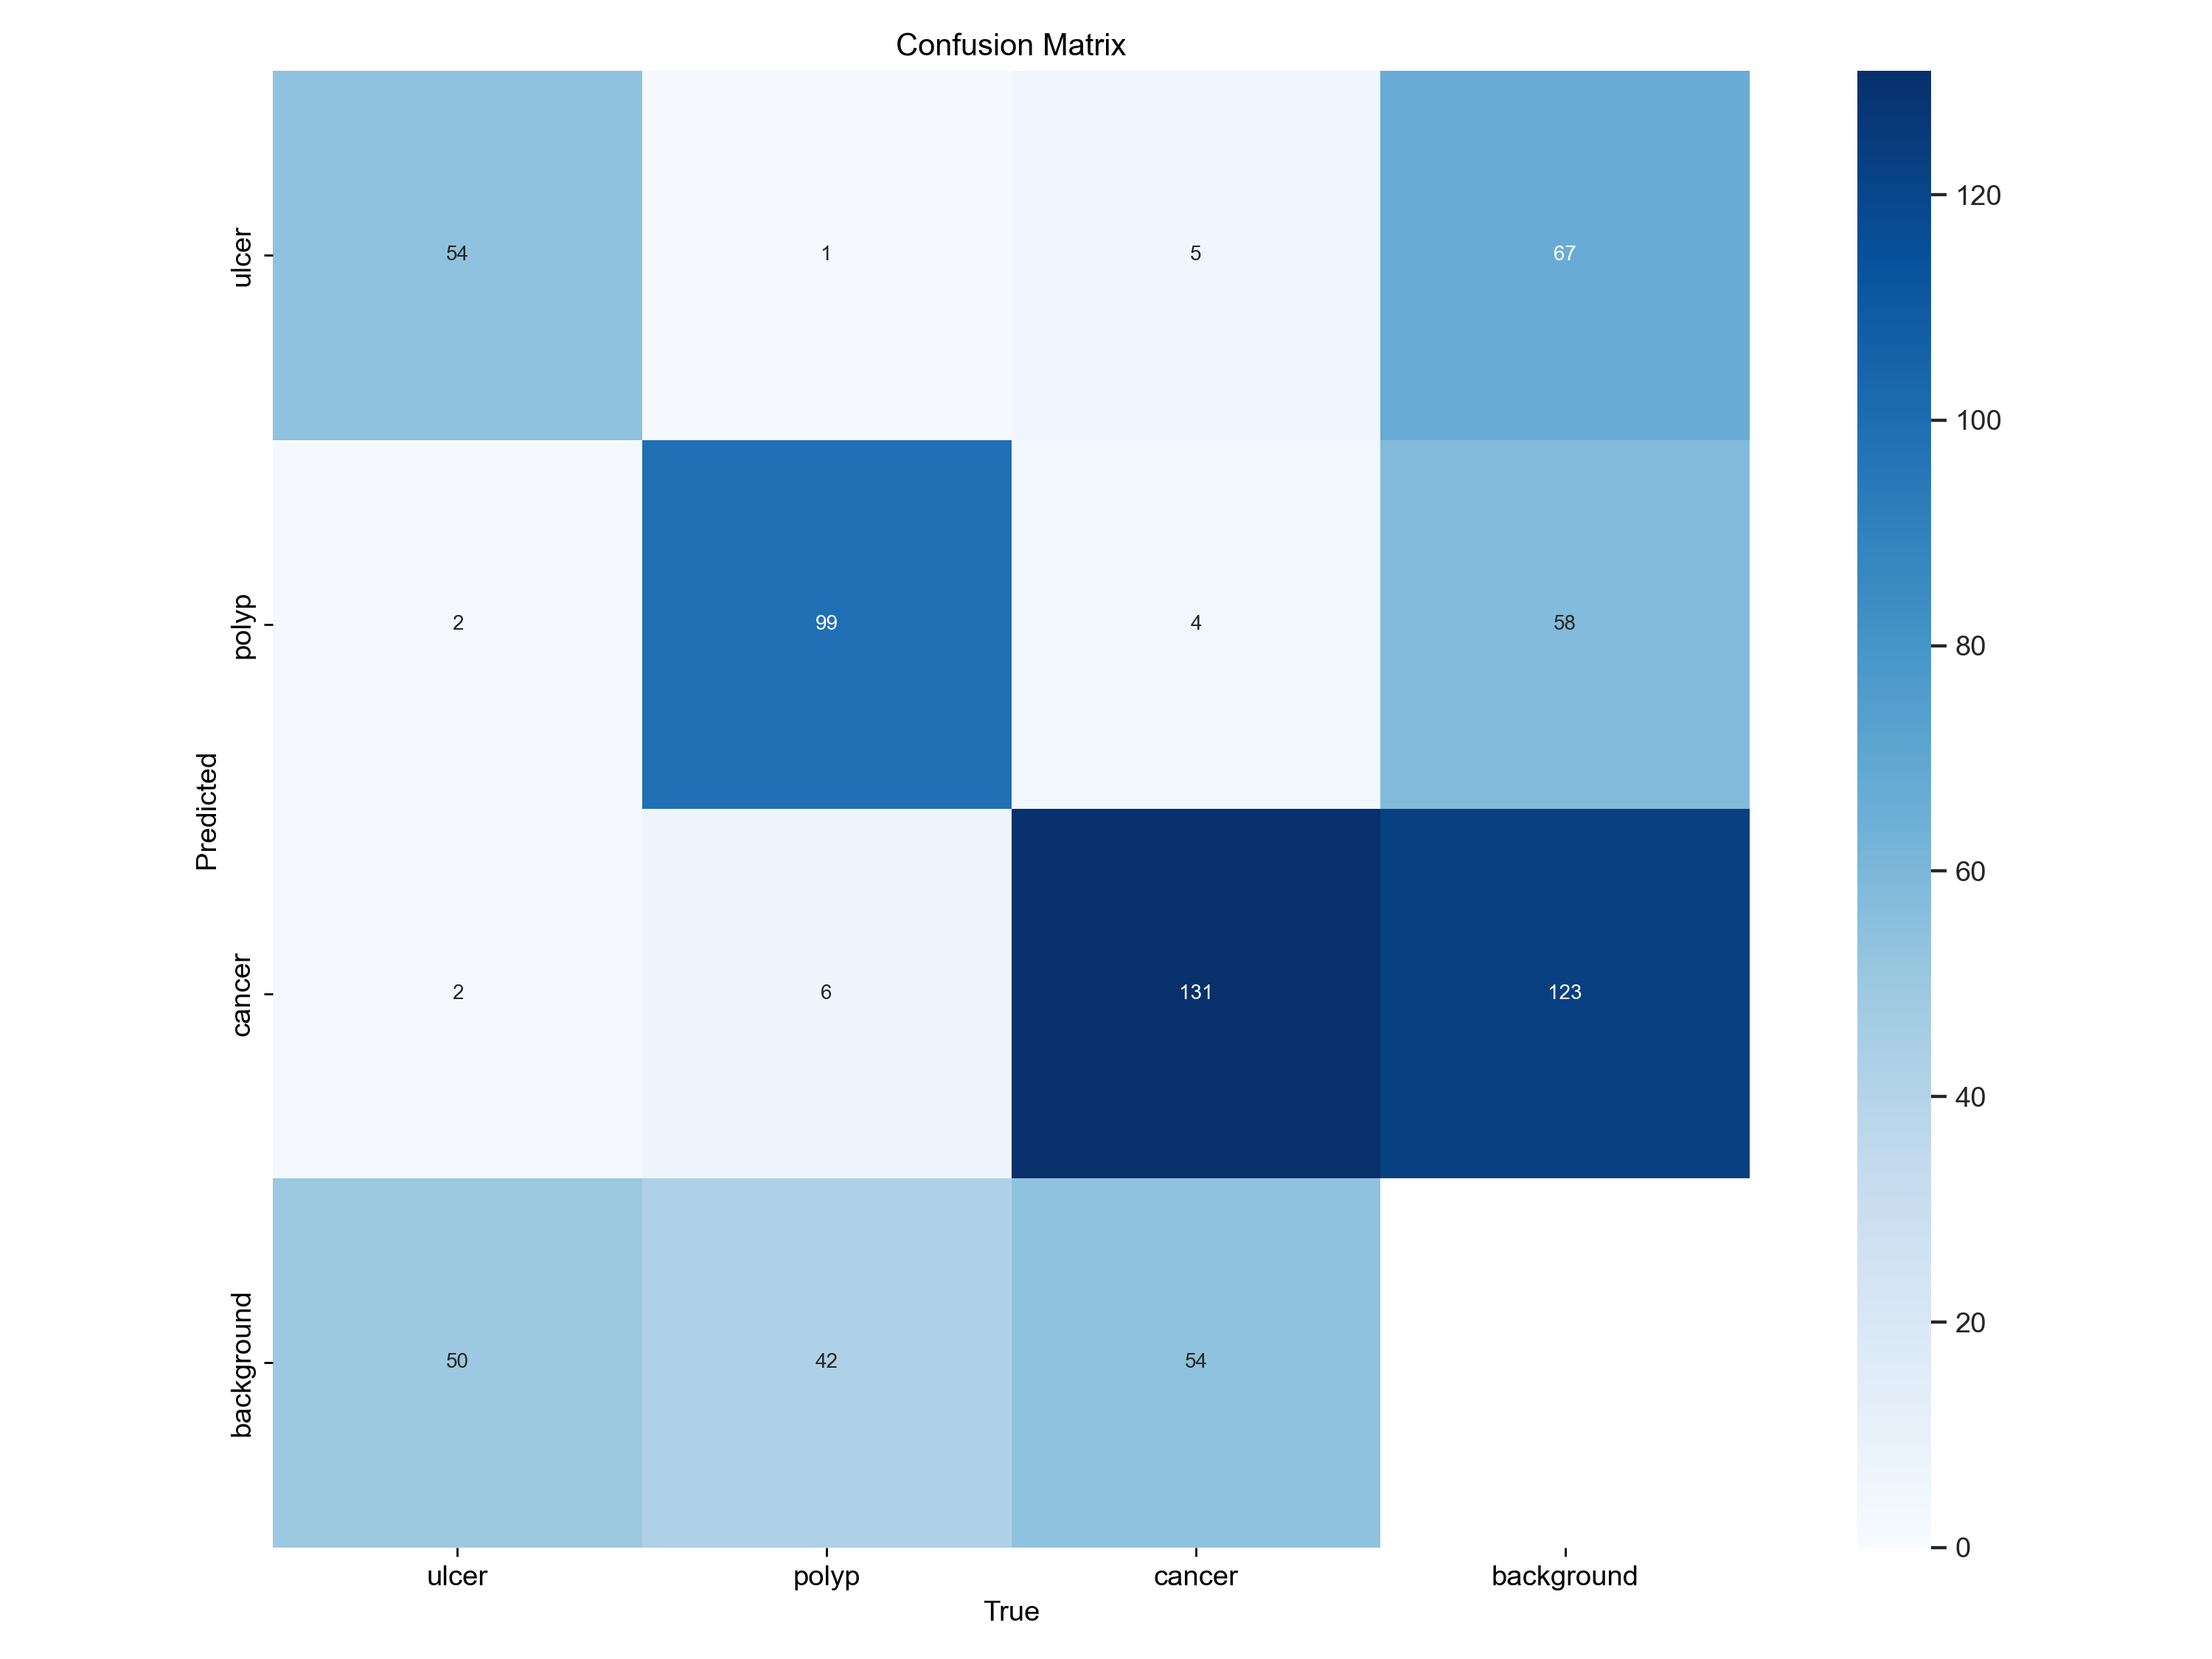

In [1]:
from PIL import Image
Image.open('C:/Users/msyu7/Desktop/detection/experiments/exp0/confusion_matrix.png')

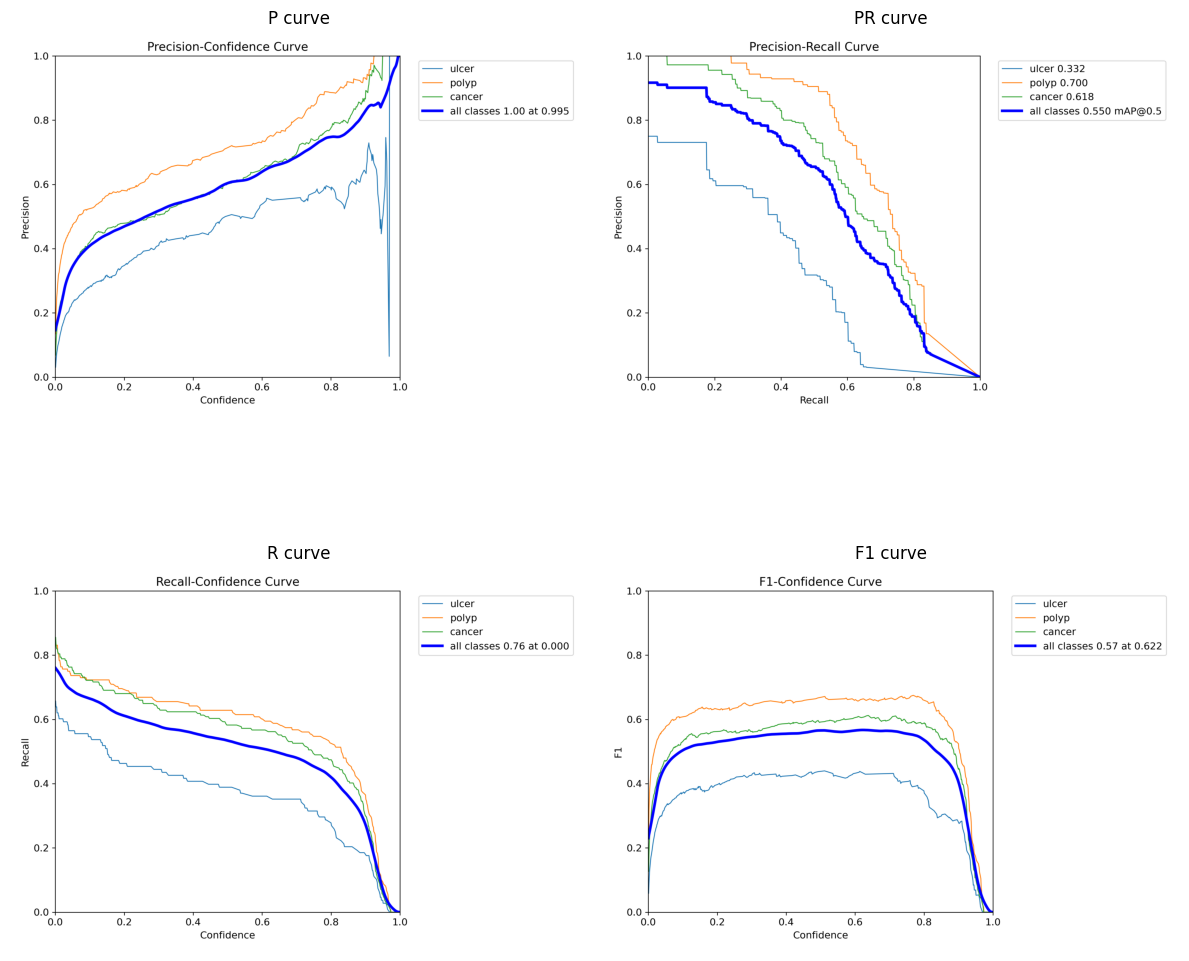

In [2]:
import matplotlib.pyplot as plt
p_path = "C:/Users/msyu7/Desktop/detection/experiments/exp0/P_curve.png"
pr_path = "C:/Users/msyu7/Desktop/detection/experiments/exp0/PR_curve.png"
r_path = "C:/Users/msyu7/Desktop/detection/experiments/exp0/R_curve.png"
f1_path = "C:/Users/msyu7/Desktop/detection/experiments/exp0/F1_curve.png"

p_img = Image.open(p_path)
pr_img = Image.open(pr_path)
r_img = Image.open(r_path)
f1_img = Image.open(f1_path)

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(p_img)
plt.title("P curve")
plt.axis("off")  

plt.subplot(2, 2, 2) 
plt.imshow(pr_img)
plt.title("PR curve")
plt.axis("off")  

plt.subplot(2, 2, 3) 
plt.imshow(r_img)
plt.title("R curve")
plt.axis("off")  

plt.subplot(2, 2, 4) 
plt.imshow(f1_img)
plt.title("F1 curve")
plt.axis("off")  

plt.tight_layout()
plt.show()


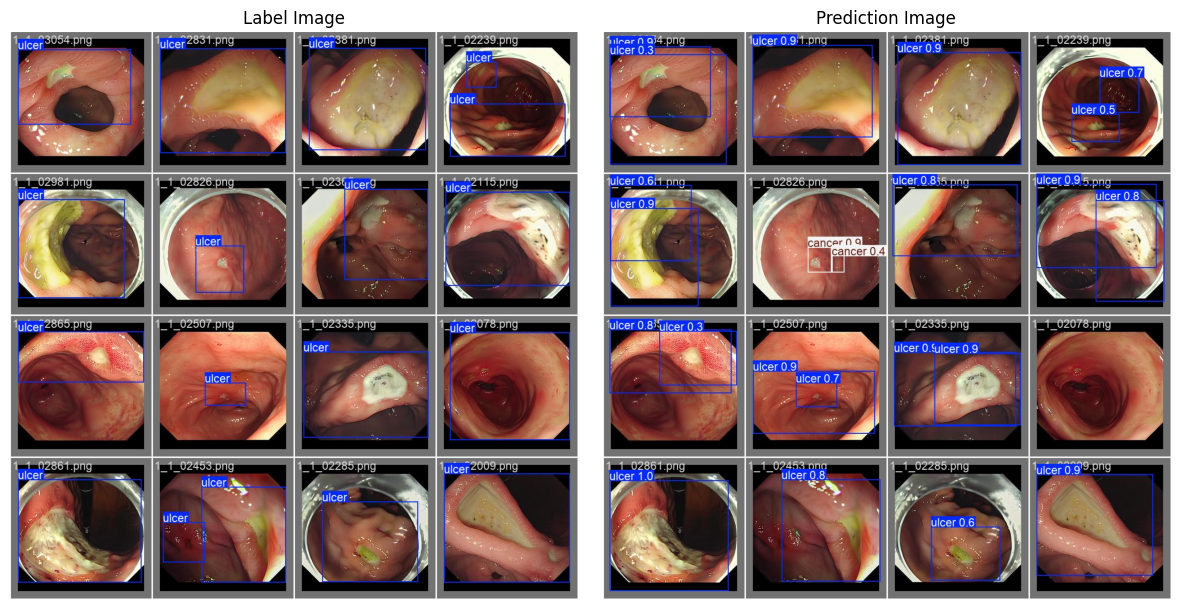

In [3]:
label_image_path = "C:/Users/msyu7/Desktop/detection/experiments/exp0/val_batch1_labels.jpg"
pred_image_path = "C:/Users/msyu7/Desktop/detection/experiments/exp0/val_batch1_pred.jpg"

label_img = Image.open(label_image_path)
pred_img = Image.open(pred_image_path)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(label_img)
plt.title("Label Image")
plt.axis("off")  

plt.subplot(1, 2, 2) 
plt.imshow(pred_img)
plt.title("Prediction Image")
plt.axis("off")  

plt.tight_layout()

plt.show()